In [ ]:
import numpy as np
import re
import string
import pandas as pd
from math import exp
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import spacy
import nltk
nltk.download('stopwords')  
nltk.download('wordnet')  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from pickle import load
from numpy import array
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('kindle_reviews1.csv')
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
df['new_reviews'] = df['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# df['new_reviews'].head()

In [ ]:
#changing the reviewTime column to be of datetime type
df.reviewTime = pd.to_datetime(df.reviewTime)
# df.head(5)
#creating a column with just the year
df['Year'] = df.reviewTime.dt.year
# df.head(5)

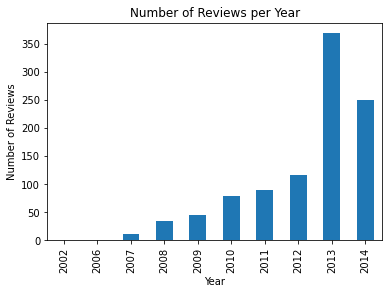

In [ ]:
df.Year.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

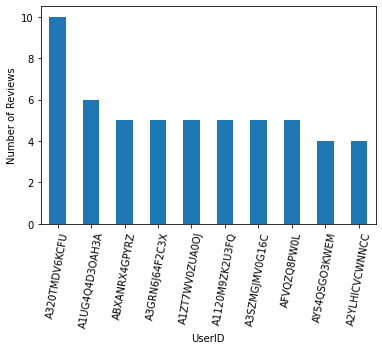

In [ ]:
# top 10 users based on reviews
df.reviewerID.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.xlabel('UserID')
plt.ylabel('Number of Reviews')
plt.show()

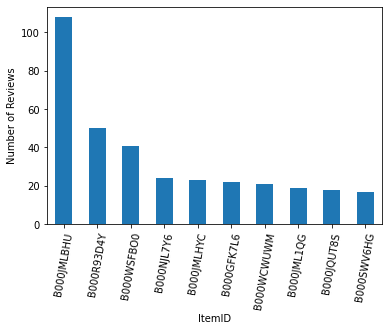

In [ ]:
# top 10 users based on reviews
df.asin.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.xlabel('ItemID')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
#TEXT PRE-PROCESSING
punc = str.maketrans('', '', string.punctuation)
#apply the empty mapping table to each element of the series where x is the review for one document.
df['new_reviews'] = df['new_reviews'].apply(lambda x : ' '.join(word.translate(punc) for word in x.split()))

#removing words that is non alpha
df['new_reviews'] = df['new_reviews'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))

#making all words to be lowercase
df['new_reviews'] = df['new_reviews'].apply(lambda x: ' '.join(word.lower() for word in x.split()))

#list of stop words
stop = stopwords.words('english')

#removing the stop words
df['new_reviews'] = df['new_reviews'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop))

#Lemmatize words to reduce them to their root form. Note: added the pos = 'v' to reduce the incoming word to verb root
lem = WordNetLemmatizer()
df['new_reviews'] = df['new_reviews'].apply(lambda x : ' '.join(lem.lemmatize(word, pos = 'v') for word in x.split()))

In [ ]:
#most frequent user id
topcust = "A320TMDV6KCFU"
#most frequent item id
topitem = "B000JMLBHU"
df1 = df.loc[df['reviewerID'] == topcust]
df2 = df.loc[df['asin'] == topitem]
reviewsUser=''
reviewsItem=''
for str in df1['new_reviews']:
  reviewsUser = reviewsUser + str
print(reviewsUser)
for str in df2['new_reviews']:
  reviewsItem = reviewsItem + str
print(reviewsItem)
df1['new_reviews'] = df1['new_reviews'].str.replace('[^\w\s]','')
# df['new_reviews'].head()

simon lebeaux inherit seaton house uncle recuperate injury stay seemingly haunt house simon haunt memories one fateful night beautiful stranger simon stay away women past four months intend keep way one rainy night another beautiful stranger show doorlottie santori trouble pennsylvania research josef zangara psychology professor zangara make seaton house exclusive hotel nineteen thirties later convict serial killer lottie overprotect five older brothers relish idea solve mystery two relax hopefully find hot guy fool around shes arrive seaton house thunderstorm lottie meet simon fall instantly lust simon clearly want nothing lotties give though plan discover mystery surround house simon try seduce bed strange things happen someone get simon go crazyleslie kelly write another hit ask trouble funny sexy sometimes spooky story blast read simon begin haunt memories guiltridden soul make want hold never let go lottie sweetheart shes beautiful witty fearless chemistry simon lottie simply sizz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
#L=5 recently purchased item in 2008
df3 = df1.loc[df1['Year'] == 2008]
recentreviews=[]
cnt=0
for str in df3['new_reviews']:
  if cnt>=5:
    break
  cnt+=1
  recentreviews.append(str)
print(len(recentreviews[4]))

930


In [ ]:
#Contextual word embeddings using bert


In [ ]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 51kB 3.8MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=0e2763e3cac922fcdeb329e3001d93703bd7617b668215195e8c3b8fb6bf1474
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=4a62002d2b8a5c31aa692155e1bc2fdb4fd5572db644bbb8b5e0570275e1ae32
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=e6e1ca558c98a61719f223bb4ff30755f29543622214b82236fdc7af2532a0eb
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.2MB 6.2MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)

TF version:  2.4.1
Hub version:  0.12.0


In [ ]:
!pip install tf-hub-nightly

     |████████████████████████████████| 112kB 5.0MB/s 


In [ ]:
hub.__version__

'0.12.0'

In [ ]:
import math
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.models import Model 
import bert

In [ ]:
max_seq_length = 512  # Your choice here.
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

In [ ]:
model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[pooled_output, sequence_output])

In [ ]:
# See BERT paper: https://arxiv.org/pdf/1810.04805.pdf
# And BERT implementation convert_single_example() at https://github.com/google-research/bert/blob/master/run_classifier.py

def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
userTokens = tokenizer.tokenize(reviewsUser)
userTrunc=[]
cnt=0
for str in userTokens:
  if cnt<510:
    userTrunc.append(str)
  else:
    break
  cnt+=1
userTrunc = ["[CLS]"] + userTrunc + ["[SEP]"]
print(len(userTrunc))

512


In [ ]:
input_ids = get_ids(userTrunc, tokenizer, max_seq_length)
input_masks = get_masks(userTrunc, max_seq_length)
input_segments = get_segments(userTrunc, max_seq_length)

In [ ]:
input_ids = np.array(input_ids)
input_masks = np.array(input_masks)
input_segments = np.array(input_segments)
pool_embs, all_embs = model.predict([[input_ids],[input_masks],[input_segments]])
for i in range(0,512):
  all_embs[i] = all_embs[i].flatten(order='A')

In [ ]:
all_embs1 = all_embs.swapaxes(0,1).swapaxes(1,2)
print(all_embs1.shape)
vocab_size=512
maxlen=768

(1, 768, 512)


In [ ]:
#Applying the ACNN architecture
filter_kernels = [1,3,5,7,9]
input_shape=(768,512)

In [ ]:
model = Sequential([
    layers.Conv1D(10, filter_kernels[0], activation='relu',name='conv1',input_shape=input_shape),
    # layers.Flatten(),
    layers.Conv1D(10, filter_kernels[0], activation='relu',name='conv1a'),
    layers.Conv1D(10, filter_kernels[1], activation='relu',name='conv2'),
    layers.Conv1D(10, filter_kernels[1], activation='relu',name='conv2a'),
    layers.MaxPooling1D(2),
    layers.Conv1D(10, filter_kernels[2], activation='relu',name='conv3'),
    layers.Conv1D(10, filter_kernels[2], activation='relu',name='conv3a'),
    layers.Conv1D(10, filter_kernels[3], activation='relu',name='conv4'),
    layers.Conv1D(10, filter_kernels[3], activation='relu',name='conv4a'),
    layers.Conv1D(10, filter_kernels[4], activation='relu',name='conv5'),
    layers.Conv1D(10, filter_kernels[4], activation='relu',name='conv5a'),
    layers.GlobalMaxPooling1D(),
    # layers.Dense(10),
])
extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(all_embs1)

In [ ]:
layer_name = ['conv1','conv1a','conv2','conv2a','conv3','conv3a','conv4','conv4a','conv5','conv5a']
userDoc=[]
for name in layer_name:
  intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(name).output)
  intermediate_output = intermediate_layer_model(all_embs1)
  out1 = np.array(intermediate_output)
  dim = out1.shape
  out1r = out1.reshape(1,dim[1]*dim[2])
  userDoc.append(np.max(out1r))
print(userDoc)

[7.024048, 5.530336, 2.7702756, 1.5315677, 1.0225488, 0.6518656, 0.27778795, 0.23561232, 0.19516999, 0.1145332]


In [ ]:
# inputs = Input(shape=(maxlen, vocab_size), name='input', dtype='float32')

# conv = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[0],
#                      border_mode='valid', activation='relu',
#                      input_shape=(maxlen, vocab_size))(inputs)
# conv = MaxPooling1D(pool_length=3)(conv)

# conv1 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[1],
#                       border_mode='valid', activation='relu')(conv)
# conv1 = MaxPooling1D(pool_length=3)(conv1)

# conv2 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[2],
#                       border_mode='valid', activation='relu')(conv1)

# conv3 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[3],
#                       border_mode='valid', activation='relu')(conv2)

# conv4 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[4],
#                       border_mode='valid', activation='relu')(conv3)

# conv5 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[5],
#                       border_mode='valid', activation='relu')(conv4)
# conv5 = MaxPooling1D(pool_length=3)(conv5)
# conv5 = Flatten()(conv5)

In [ ]:
itemTokens = tokenizer.tokenize(reviewsItem)
itemTrunc=[]
cnt=0
for str in itemTokens:
  if cnt<510:
    itemTrunc.append(str)
  else:
    break
  cnt+=1
itemTrunc = ["[CLS]"] + itemTrunc + ["[SEP]"]
print(len(itemTrunc))

512


In [ ]:
input_ids = get_ids(itemTrunc, tokenizer, max_seq_length)
input_masks = get_masks(itemTrunc, max_seq_length)
input_segments = get_segments(itemTrunc, max_seq_length)

In [ ]:
model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[pooled_output, sequence_output])

In [ ]:
input_ids = np.array(input_ids)
input_masks = np.array(input_masks)
input_segments = np.array(input_segments)
pool_embs, all_embs = model.predict([[input_ids],[input_masks],[input_segments]])
for i in range(0,512):
  all_embs[i] = all_embs[i].flatten(order='A')

In [ ]:
all_embs1 = all_embs.swapaxes(0,1).swapaxes(1,2)
print(all_embs1.shape)
vocab_size=512
maxlen=768

(1, 768, 512)


In [ ]:
#Applying the ACNN architecture
filter_kernels = [1,3,5,7,9]
input_shape=(768,512)

In [ ]:
model = Sequential([
    layers.Conv1D(10, filter_kernels[0], activation='relu',name='conv1',input_shape=input_shape),
    # layers.Flatten(),
    layers.Conv1D(10, filter_kernels[0], activation='relu',name='conv1a'),
    layers.Conv1D(10, filter_kernels[1], activation='relu',name='conv2'),
    layers.Conv1D(10, filter_kernels[1], activation='relu',name='conv2a'),
    layers.MaxPooling1D(2),
    layers.Conv1D(10, filter_kernels[2], activation='relu',name='conv3'),
    layers.Conv1D(10, filter_kernels[2], activation='relu',name='conv3a'),
    layers.Conv1D(10, filter_kernels[3], activation='relu',name='conv4'),
    layers.Conv1D(10, filter_kernels[3], activation='relu',name='conv4a'),
    layers.Conv1D(10, filter_kernels[4], activation='relu',name='conv5'),
    layers.Conv1D(10, filter_kernels[4], activation='relu',name='conv5a'),
    layers.GlobalMaxPooling1D(),
    # layers.Dense(10),
])
extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(all_embs1)

In [ ]:
layer_name = ['conv1','conv1a','conv2','conv2a','conv3','conv3a','conv4','conv4a','conv5','conv5a']
itemDoc=[]
for name in layer_name:
  intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(name).output)
  intermediate_output = intermediate_layer_model(all_embs1)
  out1 = np.array(intermediate_output)
  dim = out1.shape
  out1r = out1.reshape(1,dim[1]*dim[2])
  itemDoc.append(np.max(out1r))
print(itemDoc)

[16.565798, 9.707199, 6.686211, 5.5094557, 3.468925, 1.2824925, 0.8897752, 0.6022097, 0.3273684, 0.34958112]


In [ ]:
recentList=[]
for i in range(0,5):
  recentTokens = tokenizer.tokenize(recentreviews[i])
  recentTrunc=[]
  cnt=0
  for str in recentTokens:
    if cnt<510:
      recentTrunc.append(str)
    else:
      break
    cnt+=1
  recentTrunc = ["[CLS]"] + recentTrunc + ["[SEP]"]
  print(len(recentTrunc))
  input_ids = get_ids(recentTrunc, tokenizer, max_seq_length)
  input_masks = get_masks(recentTrunc, max_seq_length)
  input_segments = get_segments(recentTrunc, max_seq_length)
  model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[pooled_output, sequence_output])
  input_ids = np.array(input_ids)
  input_masks = np.array(input_masks)
  input_segments = np.array(input_segments)
  pool_embs, all_embs = model.predict([[input_ids],[input_masks],[input_segments]])
  for i in range(0,512):
    all_embs[i] = all_embs[i].flatten(order='A')
  all_embs1 = all_embs.swapaxes(0,1).swapaxes(1,2)
  print(all_embs1.shape)
  vocab_size=512
  maxlen=768
  filter_kernels = [1,3,5,7,9]
  input_shape=(768,512)
  model = Sequential([
      layers.Conv1D(10, filter_kernels[0], activation='relu',name='conv1',input_shape=input_shape),
      # layers.Flatten(),
      layers.Conv1D(10, filter_kernels[0], activation='relu',name='conv1a'),
      layers.Conv1D(10, filter_kernels[1], activation='relu',name='conv2'),
      layers.Conv1D(10, filter_kernels[1], activation='relu',name='conv2a'),
      layers.MaxPooling1D(2),
      layers.Conv1D(10, filter_kernels[2], activation='relu',name='conv3'),
      layers.Conv1D(10, filter_kernels[2], activation='relu',name='conv3a'),
      layers.Conv1D(10, filter_kernels[3], activation='relu',name='conv4'),
      layers.Conv1D(10, filter_kernels[3], activation='relu',name='conv4a'),
      layers.Conv1D(10, filter_kernels[4], activation='relu',name='conv5'),
      layers.Conv1D(10, filter_kernels[4], activation='relu',name='conv5a'),
      layers.GlobalMaxPooling1D(),
      # layers.Dense(10),
  ])
  extractor = keras.Model(inputs=model.inputs,
                          outputs=[layer.output for layer in model.layers])
  features = extractor(all_embs1)
  layer_name = ['conv1','conv1a','conv2','conv2a','conv3','conv3a','conv4','conv4a','conv5','conv5a']
  recentDoc=[]
  for name in layer_name:
    intermediate_layer_model = keras.Model(inputs=model.input,
                                        outputs=model.get_layer(name).output)
    intermediate_output = intermediate_layer_model(all_embs1)
    out1 = np.array(intermediate_output)
    dim = out1.shape
    out1r = out1.reshape(1,dim[1]*dim[2])
    recentDoc.append(np.max(out1r))
  print(recentDoc)
  recentList.append(recentDoc)

184


(1, 768, 512)
[4.493006, 2.5554054, 2.0454295, 0.7994128, 0.5279776, 0.29756525, 0.24511604, 0.2066627, 0.13866447, 0.10159314]
259


(1, 768, 512)
[6.225554, 3.7549357, 3.0684958, 1.6978108, 1.3687761, 0.76109076, 0.531363, 0.21965055, 0.1630478, 0.14592241]
148


(1, 768, 512)
[7.791362, 2.9909315, 1.6105893, 0.6794121, 0.43529454, 0.3717173, 0.1883695, 0.08936656, 0.06410217, 0.05023249]
255


(1, 768, 512)
[14.09284, 9.401013, 5.7297907, 3.6028974, 3.352019, 1.3139675, 0.5671944, 0.37271324, 0.22624482, 0.13550693]
179


(1, 768, 512)
[6.415463, 4.6312766, 3.0596147, 2.7755778, 1.012485, 0.4626322, 0.42359036, 0.22248018, 0.15012784, 0.106482565]


In [ ]:
print("UserDoc: ",userDoc)
print("ItemDoc: ",itemDoc)
print("RecentList ",recentList)

UserDoc:  [6.432637, 6.7074785, 2.677761, 1.7300099, 1.1392902, 0.71103656, 0.41709504, 0.3632914, 0.24258043, 0.10484188]
ItemDoc:  [9.840025, 7.481489, 2.7987692, 1.2563887, 0.6164318, 0.3191705, 0.20942439, 0.21586806, 0.16734228, 0.07859534]
RecentList  [[5.6895604, 4.548986, 2.8336587, 2.0734646, 1.2343717, 0.9271105, 0.77492636, 0.32730904, 0.14787185, 0.10690422], [5.344586, 4.5485635, 2.6167397, 1.2791425, 0.4807127, 0.26414192, 0.22324322, 0.12571996, 0.12368317, 0.08234267], [6.5836, 4.6039085, 3.791173, 2.631643, 1.7523223, 0.76761377, 0.39229175, 0.35104364, 0.12937154, 0.09109939], [9.649419, 4.056567, 2.5472648, 2.1904345, 1.8616736, 1.473857, 0.5289143, 0.32949197, 0.22005191, 0.09665949], [3.4469538, 4.515317, 1.2586894, 0.73069644, 0.46894342, 0.22655752, 0.16195221, 0.07943063, 0.06900027, 0.03624004]]


In [ ]:
# Applying head to head attention

In [ ]:
# calculating the attention weights
w=[]
p=[]
for i in range(0,5):
  pi = exp(np.dot(itemDoc,recentList[i]))
  p.append(pi)
for i in range(0,5):
  wi = p[i]/(np.sum(p))
  w.append(wi)
print(w)

[4.595586388522704e-121, 8.98390646913288e-97, 3.2291241181254914e-97, 1.0, 6.538703706910277e-90]


In [ ]:
# short term preference of user u wrt to candidate item
pus1=np.array([0,0,0,0,0,0,0,0,0,0])
for i in range(0,5):
  p1 = np.array(np.dot(w[i],recentList[i]))
  # print(p1)
  pus1 = np.add(pus1,p1)
  # print(pus1)
print(pus1)

[14.09284019  9.40101337  5.72979069  3.60289741  3.35201907  1.31396747
  0.5671944   0.37271324  0.22624482  0.13550693]


In [ ]:
#maximum attention weight
mu = np.argmax(w)
pus2 = recentList[mu]
print(pus2)
pusl=[]
pusl.append(pus1)
pusl.append(pus2)

[14.09284, 9.401013, 5.7297907, 3.6028974, 3.352019, 1.3139675, 0.5671944, 0.37271324, 0.22624482, 0.13550693]


In [ ]:
beta = []
p=[]
p1 = exp(np.dot(itemDoc,pus1))
p.append(p1)
p2 = exp(np.dot(itemDoc,pus2))
p.append(p2)
beta1 = p1/np.sum(p)
beta.append(beta1)
beta2 = p2/np.sum(p)
beta.append(beta2)
print(beta)

[0.4999999290633923, 0.5000000709366077]


In [ ]:
pus=np.array([0,0,0,0,0,0,0,0,0,0])
for i in range(0,2):
  pi = np.array(np.dot(beta[i],pusl[i]))
  pus = np.add(pus,pi)
print(pus)

[14.09284019  9.40101337  5.72979069  3.60289741  3.35201907  1.31396747
  0.5671944   0.37271324  0.22624482  0.13550693]


In [ ]:
# calculate preference score
def sigmoid(val):
  temp = 1/(1+exp(-val))
  return temp
userDoc = np.add(userDoc,np.dot(0.1,pus))
# print(userDoc)
purchaseScore = sigmoid(np.dot(userDoc,itemDoc))
print(purchaseScore)

1.0
